# Horizontal bar chart with lines

I was trying to recreate the plot from the tweet below:

![tweet](../media/tweet_levi_bar_chart_challenge.jpg)

Source:
[Twitter](https://twitter.com/levikul09/status/1639209198130192385?s=20)

## Imports

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
import pandas as pd
import numpy as np

## Data

In [2]:
df = pd.DataFrame(
    {
        "Physical therapy": [.478, .236, .217, .051, .018],
        "No physical therapy": [.417, .265, .226, .062, .03]
    },
    index = ["Much better", "Somewhat better", "About the same", "Somewhat worse", "Much worse"]
)

In [3]:
# display data
df

,Physical therapy,No physical therapy
Much better,0.478,0.417
Somewhat better,0.236,0.265
About the same,0.217,0.226
Somewhat worse,0.051,0.062
Much worse,0.018,0.030


In [4]:
# Check if data adds up to 1 or 100%
df.sum()

Physical therapy       1.0
No physical therapy    1.0
dtype: float64

## Plot

### Specify colours for the bars

In [5]:
nr_of_colours = len(df)

In [6]:
# blues [R, G, B, transparency]
blues = np.ones([len(df), 4])
blues[:, 0] = np.linspace(0, 1, nr_of_colours)
blues[:, 1] = np.linspace(0, 1, nr_of_colours)
blues[:, 2] = 1
blues[:, 3] = 1

print(blues)

[[0.   0.   1.   1.  ]
 [0.25 0.25 1.   1.  ]
 [0.5  0.5  1.   1.  ]
 [0.75 0.75 1.   1.  ]
 [1.   1.   1.   1.  ]]


In [7]:
# reds [R, G, B, transparency]
reds = np.ones([len(df), 4])
reds[:, 0] = 1
reds[:, 1] = np.linspace(0, 1, nr_of_colours)
reds[:, 2] = np.linspace(0, 1, nr_of_colours)
reds[:, 3] = 1

print(blues)

[[0.   0.   1.   1.  ]
 [0.25 0.25 1.   1.  ]
 [0.5  0.5  1.   1.  ]
 [0.75 0.75 1.   1.  ]
 [1.   1.   1.   1.  ]]


### Create a plot

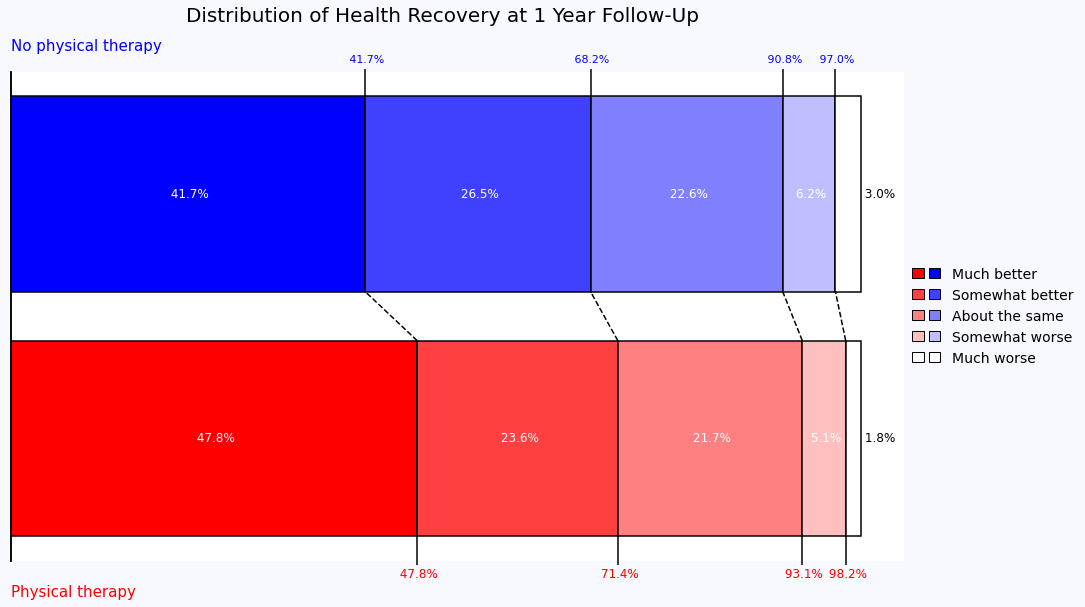

In [8]:
fig, ax = plt.subplots(
    figsize=(16, 9),
    facecolor="ghostwhite"
)
fig.suptitle(
    "Distribution of Health Recovery at 1 Year Follow-Up",
    fontsize=20
)

ax.set_ylim(-0.5, 1.5)

bottom = np.zeros(df.shape[1])
bar_width_val = 0.8
line_width_val = 1.5


legend_label_data = [
    [],  # handles
    []  # labels
]

for (idx, row), r,b in zip(df.iterrows(),reds, blues):
    # add bars
    ax.barh(
        y= df.columns,
        width=row,
        left=bottom,
        color=[r, b],
        edgecolor="black",
        linewidth=line_width_val,
        height = bar_width_val
    )
    bottom += row.values

    # plot dashed lines connecting bars for all except top bar in a stack
    if all(bottom < 1):
        ax.plot(
            bottom,
            [0 + 0.5*bar_width_val, 1 - 0.5*bar_width_val],
            linestyle="--",
            color="black",
            linewidth=line_width_val
        )

    # add "%"" labels to the bars & lines joining top/bottom tick marks with bars
    for x, y, val in [(x, y, val) for x, y, val in zip(bottom, [0, 1], row)]:
        # Labels
        if x < 1:
            text_location_x = x-0.5*val
            text_align = "center"
            col = "w"
        else:
            text_location_x = x
            text_align = "left"
            col = "k"

        ax.text(
            text_location_x, y, s=f"{val: .1%}",
            fontsize=12,
            color=col,
            ha=text_align,
            va="center"
        )

        # Lines
        if all(bottom < 1):  # for all except top bar in a stack
            if y == 0:
                min_val = ax.get_ylim()[0]
                max_val =  - 0.5*bar_width_val
            else:
                min_val = y + 0.5*bar_width_val,
                max_val = ax.get_ylim()[1],

            ax.vlines(
                x=x,
                ymin=min_val,
                ymax=max_val,
                color="k",
                linewidth=line_width_val
            )

    # create label patches for the legend
    legend_label_data[0].append(
        (
            mpl.patches.Patch(facecolor=r, edgecolor="k"), 
            mpl.patches.Patch(facecolor=b, edgecolor="k")
        )
    ) 
    legend_label_data[1].append(idx)

# add legend
ax.legend(
    legend_label_data[0],
    legend_label_data[1], 
    handler_map={tuple: HandlerTuple(ndivide=None)},
    loc="center",
    bbox_to_anchor=(1.1, .5),
    fontsize=14,
    frameon=False
)

# Tweak bottom axis
ax.set_xticks(
    df["Physical therapy"].cumsum().values[:-1],
    [f"{x: .1%}" for x in df["Physical therapy"].cumsum().values[:-1]],
    color="red",
    fontsize=12
)
# Uncomment this for spines and comment out the lines 133-135
# ax.spines["bottom"].set_color("red")
# ax.spines["top"].set_visible(False)

# Tweak top axis
ax2 = ax.twiny()
ax2.set_xticks(
    df["No physical therapy"].cumsum().values[:-1],
    [f"{x: .1%}" for x in df["No physical therapy"].cumsum().values[:-1]],
    color="blue",
    fontsize=11
)
# Uncomment this for spines and comment out the lines 133-135
# ax2.spines["top"].set_color("blue")
# ax2.spines["bottom"].set_visible(False)

for a in [ax, ax2]:
    a.set_xlim(0, 1.05)
    a.tick_params(
        axis="x",
        color="k",
        width=line_width_val
    )
    # hide spines
    a.spines["right"].set_visible(False)
    a.spines["top"].set_visible(False)
    a.spines["bottom"].set_visible(False)

ax.tick_params(
    axis="y",
    labelsize=14
)

ax.set_xlabel("Physical therapy", fontsize=15, color="r", loc="left")
ax2.set_xlabel("No physical therapy", fontsize=15, color="b", loc="left")
ax.set_yticklabels([])
ax.set_yticks([]);

# Update spines thickness
for label in ['top','bottom','left','right']:
    ax.spines[label].set_linewidth(line_width_val)
    ax2.spines[label].set_linewidth(line_width_val)

## Further improvements

* use colours from one of the Matplotlib's colour pallettes